In [1]:
import numpy as np
import keras


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path = "C:/Users/fahad/Desktop/train"
test_path = "C:/Users/fahad/Desktop/test"

In [4]:
train_data = ImageDataGenerator(rescale = 1./225)
test_data = ImageDataGenerator(rescale = 1./225)

In [5]:
X = train_data.flow_from_directory(train_path,target_size =(150,150),batch_size=35,class_mode = 'binary')

y = test_data.flow_from_directory(test_path,target_size =(150,150),batch_size=35,class_mode = 'binary')

Found 1275 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters = 32 , kernel_size = (4,4),input_shape = (150,150,3),activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())

C:\Users\fahad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Dense(units = 70,activation ='relu'))
model.add(Dense(units = 1,activation ='sigmoid'))

In [10]:
model.compile(optimizer = "adam",loss = 'binary_crossentropy',metrics = ['accuracy'])

In [11]:
model.fit(X,validation_data = y,epochs = 2,steps_per_epoch =15)

Epoch 1/2


C:\Users\fahad\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5444 - loss: 4.5943 - val_accuracy: 0.4231 - val_loss: 0.7547
Epoch 2/2
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 916ms/step - accuracy: 0.4303 - loss: 0.7288 - val_accuracy: 0.6374 - val_loss: 0.6924


In [12]:
model.save('daisyvsdandelions.keras')

In [13]:
from keras.models import load_model
import numpy as np

In [14]:
model = load_model('daisyvsdandelions.keras')

In [15]:
from keras.utils import img_to_array,load_img

In [16]:
img = load_img("C:/Users/fahad/Desktop/th (1).jpeg",target_size = (150,150))

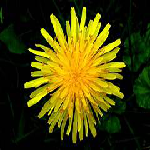

In [17]:
img

In [18]:
img = img_to_array(img)

In [19]:
img

array([[[ 5.,  0.,  0.],
        [ 4.,  0.,  0.],
        [ 2.,  1.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 5.,  0.,  0.],
        [ 4.,  0.,  0.],
        [ 2.,  1.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 2.,  0.,  1.],
        [ 2.,  0.,  1.],
        [ 1.,  1.,  1.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [40., 38., 26.],
        [45., 47., 34.],
        [26., 30., 16.]],

       [[12., 12., 12.],
        [ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        ...,
        [ 3.,  0.,  0.],
        [ 0.,  2.,  0.],
        [ 3.,  6.,  0.]],

       [[21., 21., 21.],
        [ 2.,  2.,  2.],
        [ 0.,  0.,  0.],
        ...,
        [ 3.,  0.,  0.],
        [ 0.,  1.,  0.],
        [28., 31., 24.]]

In [20]:
img_size = np.expand_dims(img,axis = 0)

In [21]:
img_size.shape

(1, 150, 150, 3)

In [22]:
pred = model.predict(img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [23]:
pred

array([[0.00932723]], dtype=float32)

In [24]:
img1 = load_img("C:/Users/fahad/Desktop/daisy.webp",target_size = (150,150))

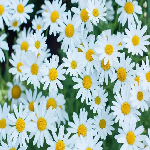

In [25]:
img1

In [26]:
img1 = img_to_array(img1)

In [27]:
img1

array([[[205., 221., 236.],
        [219., 235., 250.],
        [214., 230., 245.],
        ...,
        [ 51.,  87.,  63.],
        [ 69., 115.,  95.],
        [ 65., 112.,  91.]],

       [[213., 229., 244.],
        [217., 232., 248.],
        [212., 228., 243.],
        ...,
        [ 45.,  81.,  57.],
        [ 64., 111.,  90.],
        [ 65., 112.,  91.]],

       [[212., 228., 243.],
        [217., 232., 248.],
        [211., 227., 242.],
        ...,
        [ 48.,  83.,  60.],
        [ 66., 112.,  95.],
        [ 65., 111.,  93.]],

       ...,

       [[197., 222., 237.],
        [200., 224., 241.],
        [210., 235., 252.],
        ...,
        [208., 228., 244.],
        [217., 236., 248.],
        [199., 218., 227.]],

       [[199., 224., 238.],
        [201., 226., 242.],
        [201., 226., 242.],
        ...,
        [208., 226., 241.],
        [214., 232., 246.],
        [196., 218., 209.]],

       [[199., 224., 238.],
        [199., 223., 240.],
        [199., 2

In [28]:
img_size = np.expand_dims(img,axis = 0)

In [29]:
img_size.shape

(1, 150, 150, 3)

In [30]:
pred1 = model.predict(img_size)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [31]:
pred1 = np.argmax(pred)

In [32]:
pred1

0